In [37]:
import os
from fibsem import utils, acquire, milling, movement
import numpy as np
from autoscript_sdb_microscope_client.structures import StagePosition

from PIL import Image
from pprint import pprint

from autoscript_sdb_microscope_client.structures import BitmapPatternDefinition
from fibsem.ui import windows
import matplotlib.pyplot as plt

BASE_PATH = os.path.dirname(r"C:\Users\Admin\Github\fibsem\example\lens_milling.py")

In [38]:
    
PROTOCOL_PATH = os.path.join(BASE_PATH, "protocol_lens_milling.yaml")

microscope, settings = utils.setup_session(protocol_path=PROTOCOL_PATH)


2022-09-19 15:54:31,867 — root — INFO — connect_to_microscope:28 — Microscope client connecting to [10.0.0.1]
2022-09-19 15:54:31,889 — root — INFO — connect_to_microscope:31 — Microscope client connected to [10.0.0.1]
2022-09-19 15:54:31,890 — root — INFO — setup_session:241 — Finished setup for session: lens_milling_demo_2022-09-19.03-54-31PM


Client connecting to [10.0.0.1:7520]...
Client connected to [10.0.0.1:7520]


In [39]:
# arr = np.ones(shape=(500, 500)) * 10e-6

In [67]:
def save_profile_to_bmp(arr: np.ndarray, fname: str = "profile.bmp"):
    
    # invert profile
    arr = abs(arr - np.max(arr)).T
    arr = np.rot90(arr)

    # scale values to int
    arr = (arr / np.max(arr)) * 255
    arr = arr.astype(np.uint8)

    # save profile
    img = Image.fromarray(arr).convert("RGB")
       
    img.save(fname)


In [68]:
# lens plane
settings.system.stage.tilt_flat_to_electron = 0


In [69]:
# lens profile files
npy_path = os.path.join(BASE_PATH, settings.protocol["profile"])
bmp_path = os.path.join(BASE_PATH, "profile.bmp")

print(npy_path)
# load lens properties
lens_profile = np.load(npy_path)
# lens_profile = arr
pixel_size = settings.protocol["pixelsize"]
lens_height = lens_profile.shape[0] * pixel_size
lens_width = 1 * pixel_size


# save profile to bmp
save_profile_to_bmp(lens_profile, bmp_path)



C:\Users\Admin\Github\fibsem\example\lens_lowres_half.npy


In [70]:
# acquire.new_image(microscope, settings.image)

In [71]:
# bmp_path = r"C:\Users\Admin\Github\fibsem\example\lens.bmp"
# load bmp pattern
bitmap_pattern = BitmapPatternDefinition()
bitmap_pattern = bitmap_pattern.load(bmp_path)


In [72]:
# # milling setup
milling.setup_milling(
    microscope, 
    application_file=settings.protocol["application_file"],
    hfw=900e-6
)


2022-09-19 16:11:00,720 — root — INFO — setup_milling:35 — setup ion beam milling
2022-09-19 16:11:00,721 — root — INFO — setup_milling:36 — application file:  Si, pattern mode: Serial, hfw: 0.0009


In [74]:
microscope.patterning.clear_patterns()

# initial exposure
pattern = microscope.patterning.create_rectangle(
    center_x=0, center_y=0,
    width = 800e-6,
    height= 400e-6,
    depth=  0.6e-6
)

pattern  = microscope.patterning.create_bitmap(
    center_x=0, center_y=0,
    width=800e-6,   # length
    height=400e-6,  # diameter
    depth=5e-6,     # height
    bitmap_pattern_definition=bitmap_pattern,
)


In [56]:
# npixels of bmp determines resolution
# bitmap needs to be 2D, struggles with 1D.
# pixelsize determines resolution, probs best to always use 2D.

print(f"pattern:", pattern.time)


138286.91199431228


In [75]:
milling.run_milling(microscope, milling_current=500e-9)

2022-09-19 16:13:33,478 — root — INFO — run_milling:60 — running ion beam milling now... asynchronous=False


In [ ]:
milling.finish_milling(microscope)


(880001,)


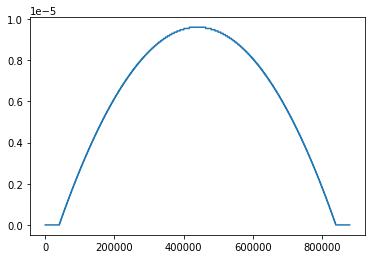

In [19]:
import matplotlib.pyplot as plt


arr = np.load(npy_path)

print(arr.shape)


plt.plot(arr)
plt.show()

(500, 1000)


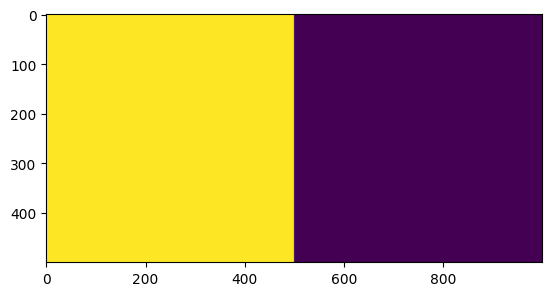

In [2]:
import numpy as np


arr1 = np.ones(shape=(500, 500))
arr2 = np.zeros_like(arr1)


arr = np.concatenate([arr1, arr2], axis=1)

print(arr.shape)
import matplotlib.pyplot as plt

plt.imshow(arr)
plt.show()